In [167]:
from keras import models, layers, optimizers, regularizers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('online_shoppers_intention.csv')

# Data description
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# Data Preprocessing

### Change every attribute to integer

1. Month
    - 1: Jan
    - 2: Feb
    - vise versa in the middle
    - 12: Dec
2. VisitorType
    - 0: New_Visitor
    - 1: Returning_Visitor
    - 2: Other
3. Weekend
    - 0: False
    - 1: True
4. Revenue
    - 0: False
    - 1: True

In [121]:
monthDict = {'Jun':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

df['Month'] = df['Month'].map(monthDict)
for i in range(len(df)):
    
    if df.iloc[i, 15] == "New_Visitor":
        df.iloc[i, 15] = 0
    elif df.iloc[i, 15] == "Returning_Visitor":
        df.iloc[i, 15] = 1
    elif df.iloc[i, 15] == "Other":
        df.iloc[i, 15] = 2
        
    if df.iloc[i, 16] == False:
        df.iloc[i, 16] = 0
    elif df.iloc[i, 16] == True:
        df.iloc[i, 16] = 1
        
    if df.iloc[i, 17] == False:
        df.iloc[i, 17] = 0
    elif df.iloc[i, 17] == True:
        df.iloc[i, 17] = 1

In [102]:
df.isna().sum()

Administrative                 0
Administrative_Duration        0
Informational                  0
Informational_Duration         0
ProductRelated                 0
ProductRelated_Duration        0
BounceRates                    0
ExitRates                      0
PageValues                     0
SpecialDay                     0
Month                      12330
OperatingSystems               0
Browser                        0
Region                         0
TrafficType                    0
VisitorType                    0
Weekend                        0
Revenue                        0
dtype: int64

Check the relationship between Revenue and other attribute. And think what attribute is useless

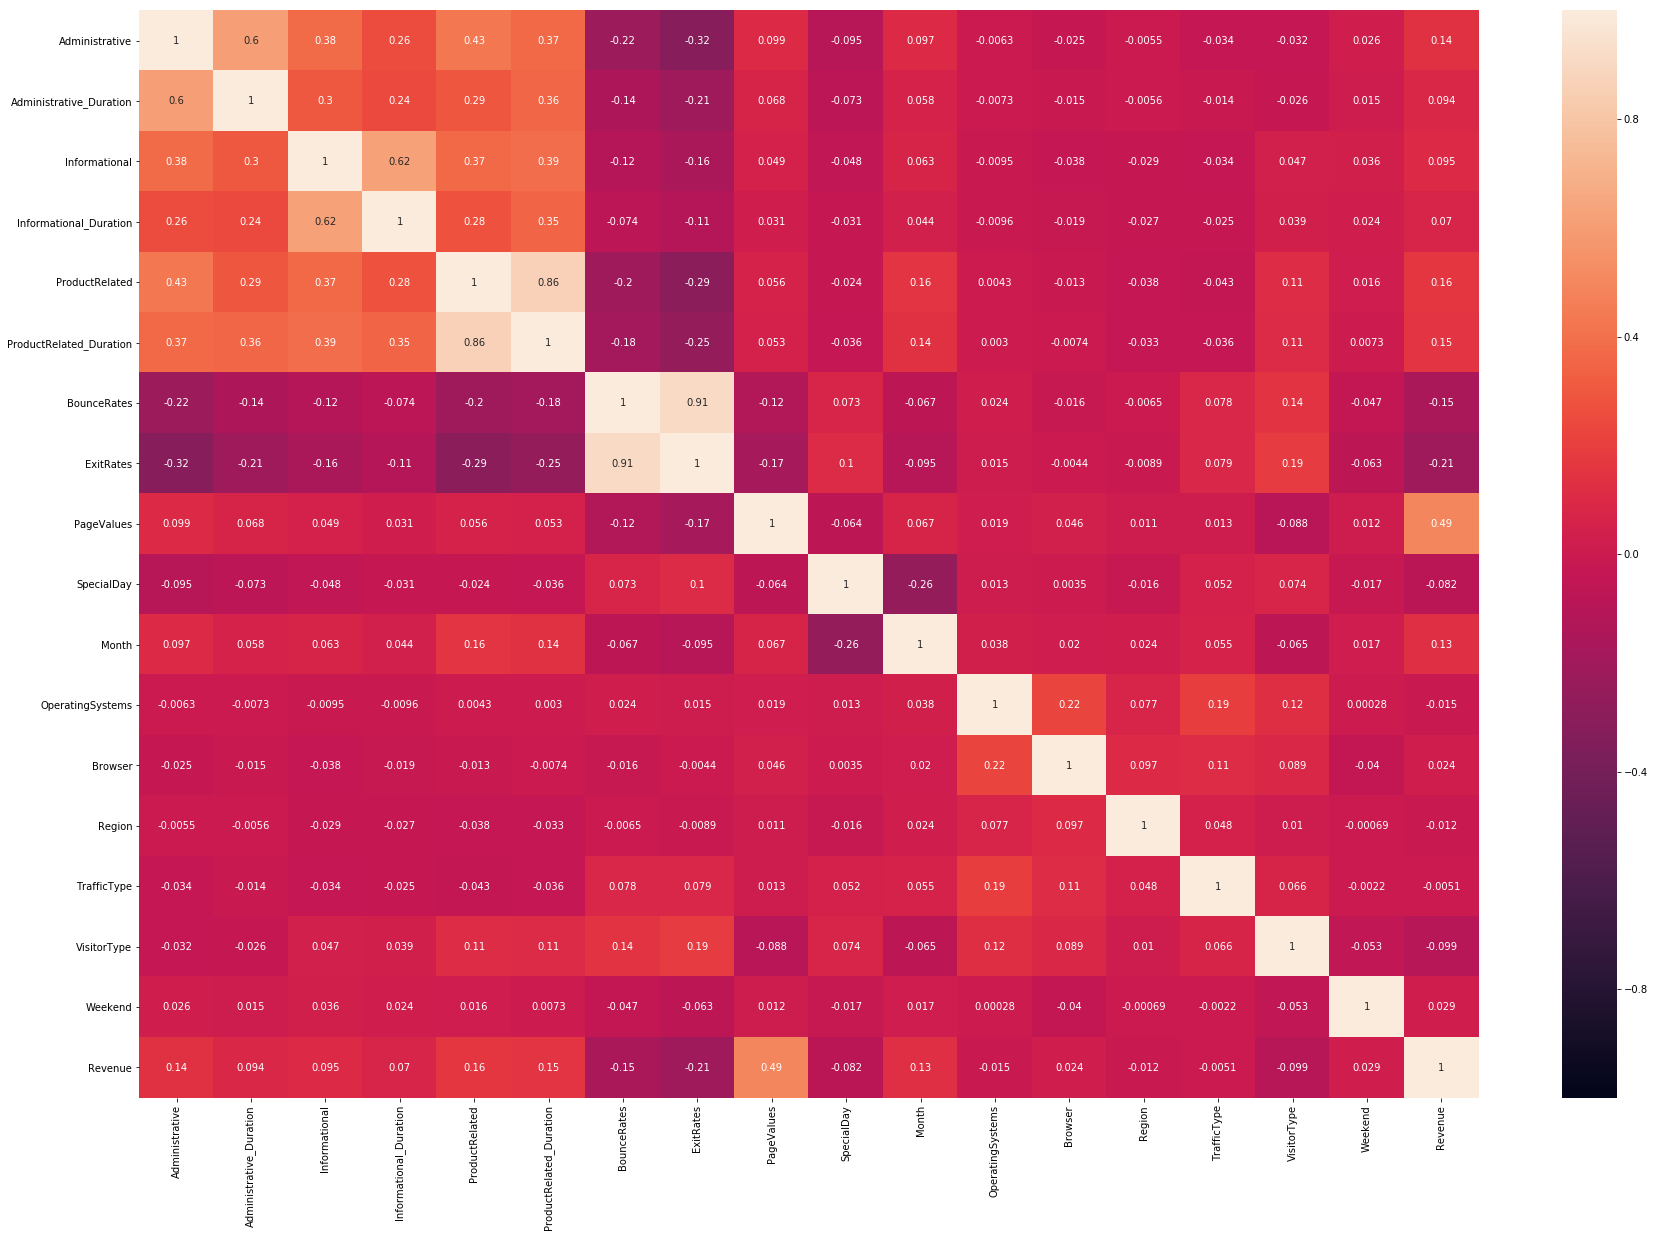

In [166]:
corr = df.corr()
#plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(corr, vmin=-1,vmax=1,annot=True)

Page values has the highest correlationship(0.49)


In [222]:
df_new = df.drop(columns=["BounceRates", "ExitRates", "Region", "OperatingSystems", "Browser", "SpecialDay", "VisitorType", "TrafficType"])
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,Month,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.0,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.0,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.0,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.0,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.0,2,1,0


Split the data to test data and train data

In [223]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_new, test_size=0.3)

In [224]:
train_x = train.drop(columns=["Revenue"])
train_y = train["Revenue"]
train_y = np.array(train_y, dtype=int)

test_x = test.drop(columns=["Revenue"])
test_y = test["Revenue"]
train_y = np.array(train_y, dtype=int)

## Normoalization

Since different features may use different scales, normalization can help learning algorithms be more effective

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_x_std = scaler.transform(train_x)
test_x_std = scaler.transform(test_x)

# Logistic Resgresion

In [226]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
_ = lr_model.fit(train_x_std, train_y)

In [227]:
lr_predict = lr_model.predict(test_x_std)
print(accuracy_score(test_y, lr_predict))

0.8767234387672344


# SVM

SVM with default parameter self

In [228]:
from sklearn.svm import SVC

svm_model = SVC()
_ = svm_model.fit(train_x_std, train_y)

In [229]:
svm_predict = svm_model.predict(test_x_std)
print(accuracy_score(test_y, svm_predict))

0.8902406055690727


The accuracy using SVM with default parameters is 0.8902406055690727, let see what will happpen if we try to adjust penalty.

In [231]:
svm_penalty = np.zeros(10)
svm_accur_adjusted = np.zeros(10)

for i in range(10):
    svm_penalty[i] = i + 1
    svm_model = SVC(C=svm_penalty[i])
    svm_model.fit(train_x_std, train_y)
    
    svm_predict = svm_model.predict(test_x_std)
    svm_accur_adjusted[i] = accuracy_score(test_y, svm_predict)

In [232]:
svm_accur_adjusted

array([0.89024061, 0.88969992, 0.89051095, 0.89051095, 0.89024061,
       0.89159232, 0.89186267, 0.89051095, 0.89105164, 0.89078129])

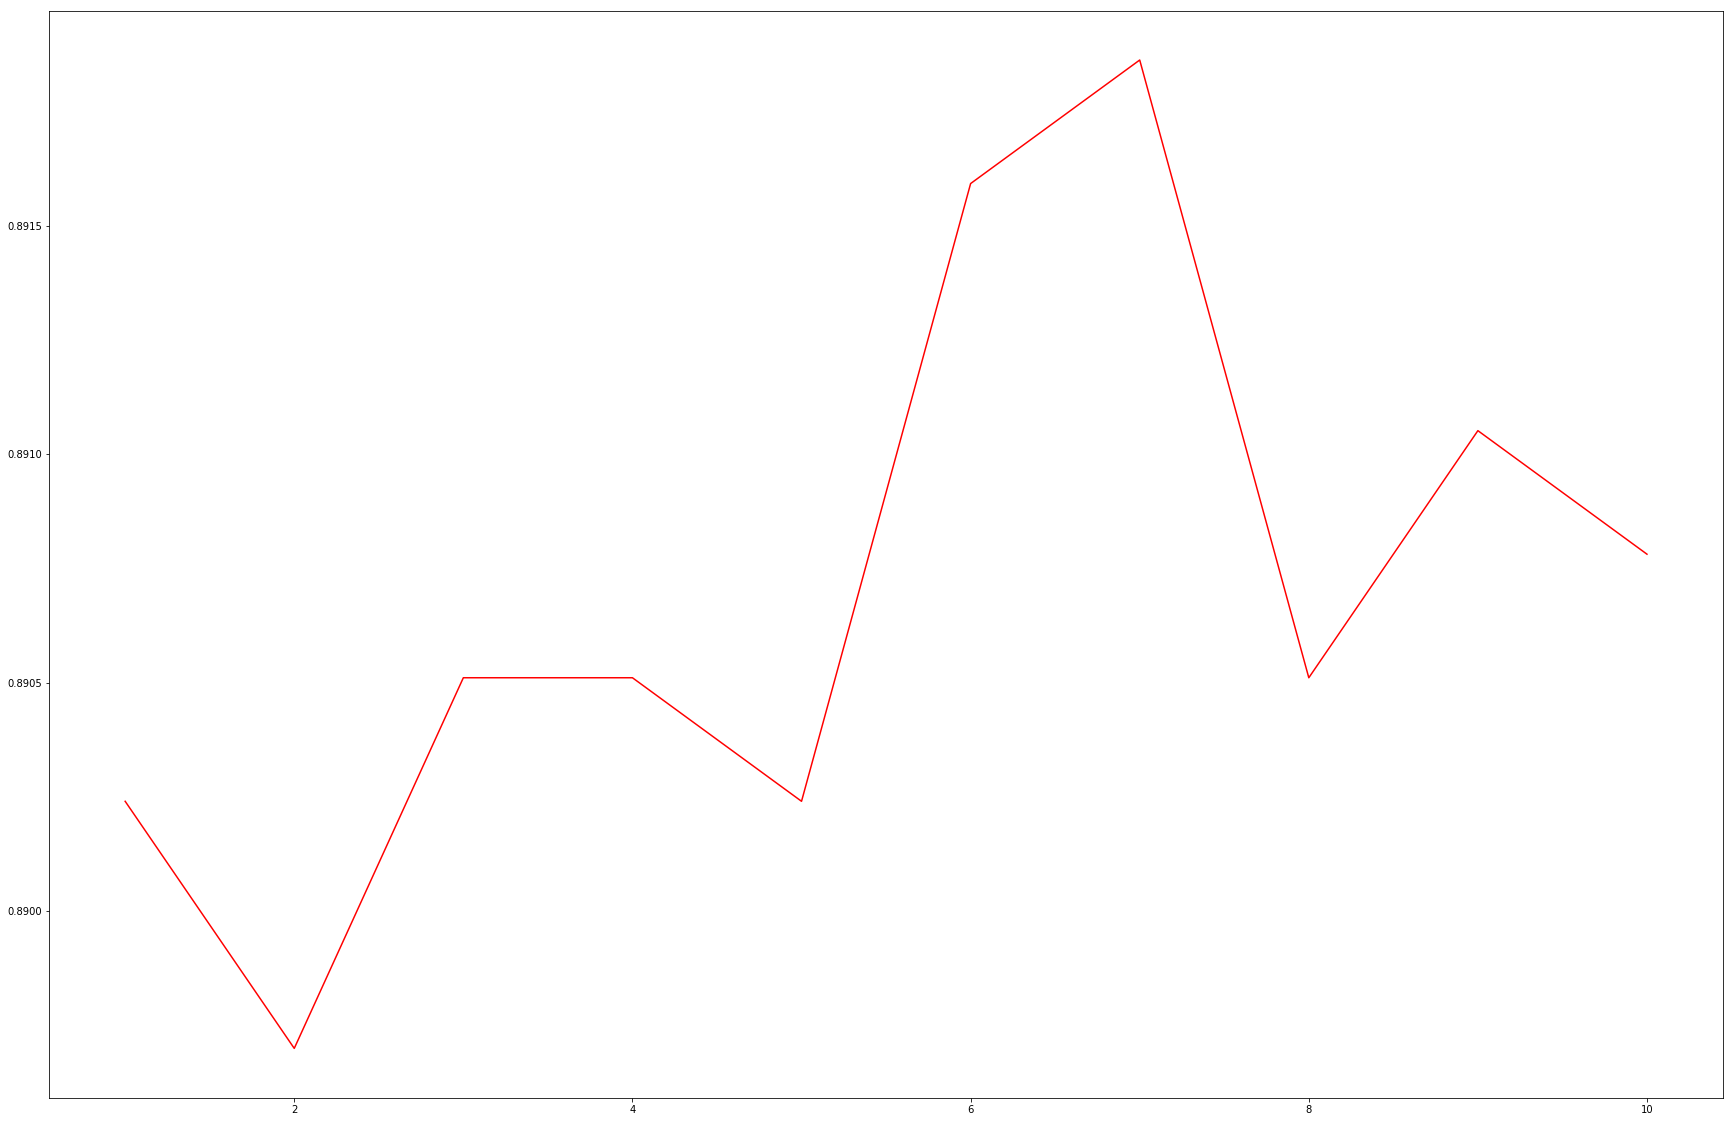

In [233]:
svm_accur_adjusted
plt.plot(svm_penalty, svm_accur_adjusted, 'r-')

The result shows that if we set penalty to 7, we will get the best performance(0.89186267). Since if penalty is smaller, it can't tolerate any error, which is easy to overfit. However if penelty is parger, is easy to underfit. Thus we have to find a suitable middle penalty.

# NN

In [234]:
model = models.Sequential()
model.add(layers.Dense(units=10,
                       input_dim=train_x.shape[1], 
                       activation='relu'))

model.add(layers.Dense(units=1,
                       activation='sigmoid'))


model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(lr=0.01),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 11        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [235]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

In [236]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(train_y)
                                               ,train_y)

history = model.fit(train_x_std, 
                    train_y, 
                    epochs=10,
                    batch_size=32,
                    class_weight=class_weight)

Epoch 1/10
8631/8631 [==============================] - 1s 130us/step - loss: 0.3136 - acc: 0.8694
Epoch 2/10
8631/8631 [==============================] - 0s 28us/step - loss: 0.2590 - acc: 0.8949
Epoch 3/10
8631/8631 [==============================] - 0s 34us/step - loss: 0.2515 - acc: 0.8947
Epoch 4/10
8631/8631 [==============================] - 0s 42us/step - loss: 0.2481 - acc: 0.8972
Epoch 5/10
8631/8631 [==============================] - 0s 27us/step - loss: 0.2477 - acc: 0.8980
Epoch 6/10
8631/8631 [==============================] - 0s 33us/step - loss: 0.2453 - acc: 0.8965
Epoch 7/10
8631/8631 [==============================] - 0s 33us/step - loss: 0.2433 - acc: 0.8961
Epoch 8/10
8631/8631 [==============================] - 0s 31us/step - loss: 0.2439 - acc: 0.8980
Epoch 9/10
8631/8631 [==============================] - 0s 27us/step - loss: 0.2422 - acc: 0.8987
Epoch 10/10
8631/8631 [==============================] - 0s 26us/step - loss: 0.2427 - acc: 0.8987


In [237]:
nn_pred = model.predict_classes(test_x_std)
print(accuracy_score(test_y, nn_pred))

0.8932143822654771


Add more hidden layer and add more hidden unit

In [175]:
model = models.Sequential()
model.add(layers.Dense(units=200,
                       input_dim=train_x.shape[1], 
                       activation='relu'))

model.add(layers.Dense(units=100,
                       activation='relu'))

model.add(layers.Dense(units=20,
                       activation='relu'))

model.add(layers.Dense(units=1,
                       activation='sigmoid'))


model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(lr=0.01),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 200)               2000      
_________________________________________________________________
dense_50 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_51 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 21        
Total params: 24,141
Trainable params: 24,141
Non-trainable params: 0
_________________________________________________________________


In [176]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

In [178]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(train_y)
                                               ,train_y)

history = model.fit(train_x_std, 
                    train_y, 
                    epochs=10,
                    batch_size=32,
                    class_weight=class_weight)

Epoch 1/10
9864/9864 [==============================] - 1s 125us/step - loss: 0.2878 - acc: 0.8893
Epoch 2/10
9864/9864 [==============================] - 0s 38us/step - loss: 0.2643 - acc: 0.8938
Epoch 3/10
9864/9864 [==============================] - 0s 38us/step - loss: 0.2639 - acc: 0.8966
Epoch 4/10
9864/9864 [==============================] - 0s 39us/step - loss: 0.2600 - acc: 0.8960
Epoch 5/10
9864/9864 [==============================] - 1s 53us/step - loss: 0.2582 - acc: 0.8949
Epoch 6/10
9864/9864 [==============================] - 1s 52us/step - loss: 0.2582 - acc: 0.8969
Epoch 7/10
9864/9864 [==============================] - 0s 40us/step - loss: 0.2555 - acc: 0.8992
Epoch 8/10
9864/9864 [==============================] - 0s 45us/step - loss: 0.2576 - acc: 0.8979
Epoch 9/10
9864/9864 [==============================] - 0s 39us/step - loss: 0.2549 - acc: 0.8977
Epoch 10/10
9864/9864 [==============================] - 0s 42us/step - loss: 0.2539 - acc: 0.8974


2466/2466 [==============================] - 0s 15us/step
Training accuracy: 0.9006488240064883
Testing accuracy: 0.8933495539334956


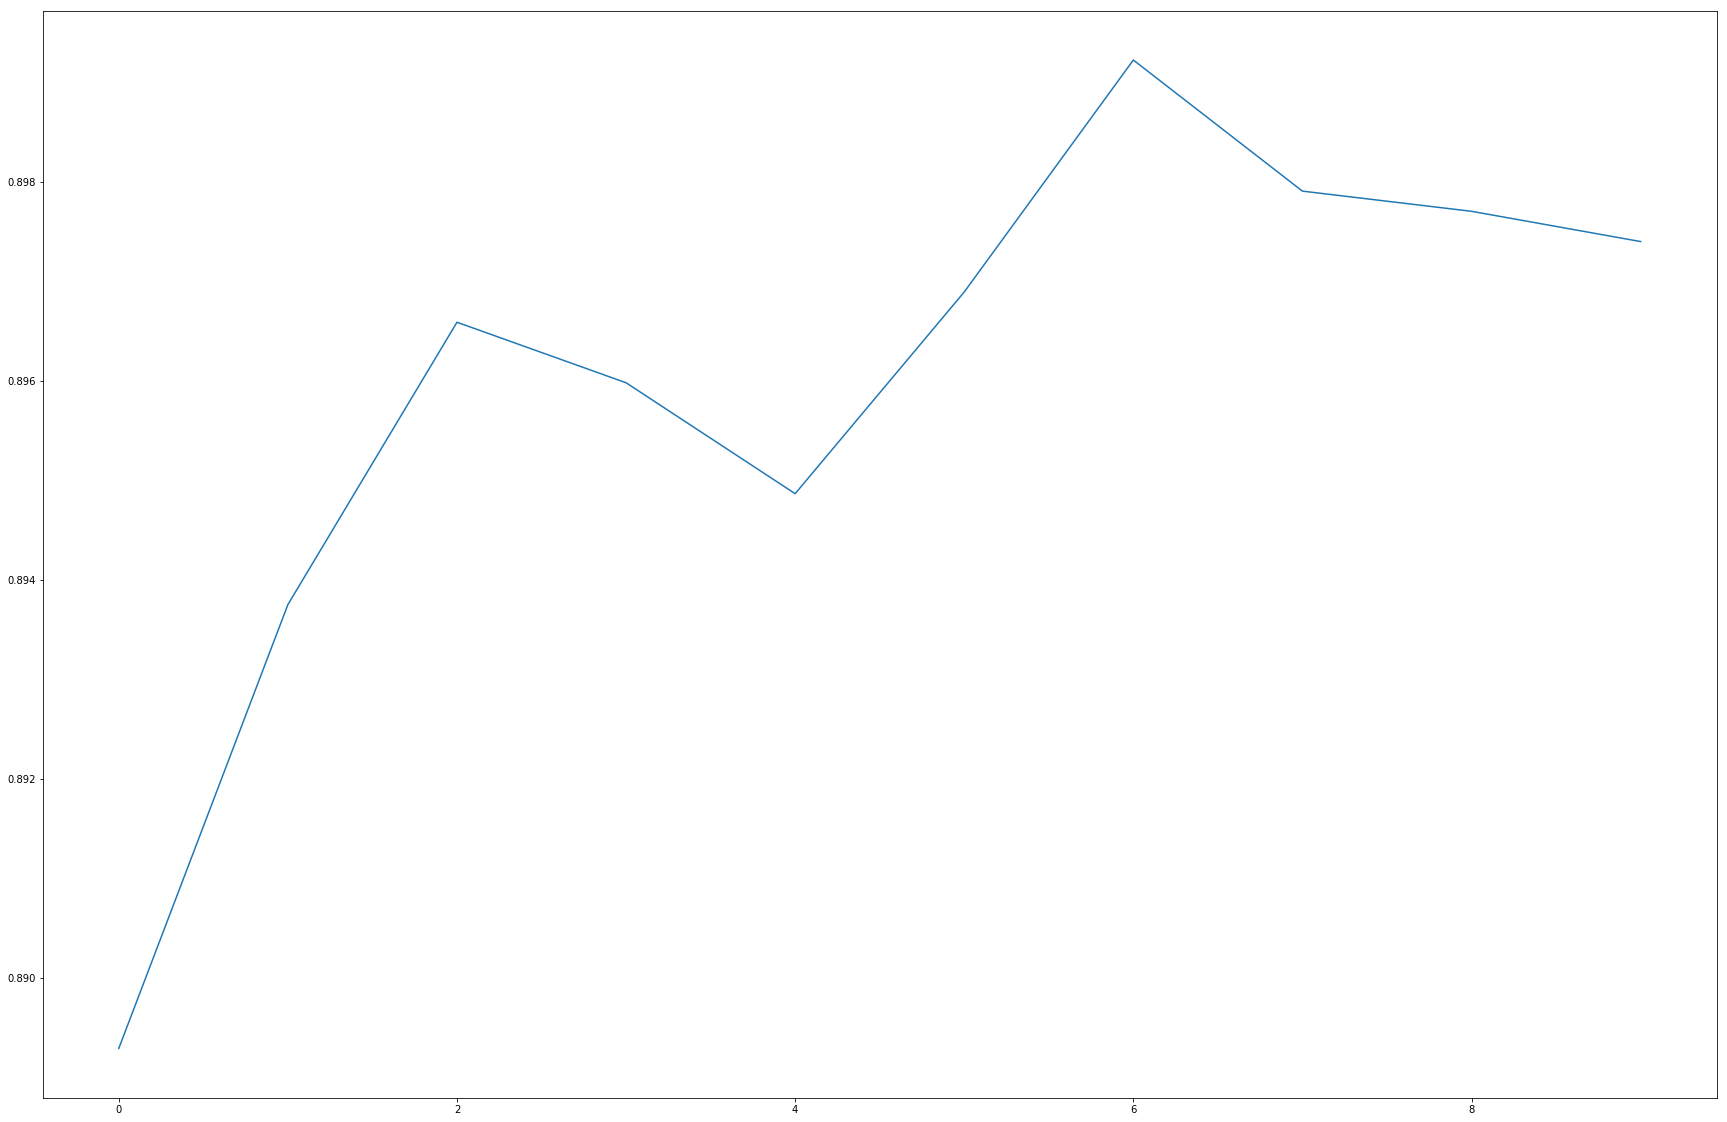

In [179]:
train_acc = model.evaluate(train_x_std, train_y, batch_size=32)[1]
test_acc = model.evaluate(test_x_std, test_y, batch_size=32)[1]

print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

#losses = history.history['acc']
plt.plot(history.history['acc'])
plt.show()

In [182]:
nn_pred = model.predict_classes(test_x_std)
print(accuracy_score(test_y, nn_pred))

0.8933495539334956


# Desicion Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz

import pydotplus

In [239]:
data = df.drop(columns=["BounceRates", "ExitRates", "Region", "OperatingSystems", "Browser", "SpecialDay", "VisitorType", "TrafficType"])

In [240]:

x = data.drop(columns=["Revenue"])
y = data['Revenue']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [242]:
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(train_x_std, train_y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(x_train),
                class_names=['did not buy','buy'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("buy.pdf")

True